In [2]:
import sys
import csv
import json
import requests
import requests_cache
import numpy as np
import pandas as pd
from yahoo_finance import Share
from pprint import pprint 
from datetime import datetime
import matplotlib.pyplot as plt
#import pandas_datareader.data as web

import matplotlib as mpl
%matplotlib inline

import seaborn as sns
sns.set_style('white', {"xtick.major.size": 2, "ytick.major.size": 2})
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71","#f4cae4"]
sns.set_palette(sns.color_palette(flatui,7))

import missingno as msno

In [3]:
comp = Share('AAPL')
c = comp.get_historical('2000-11-03', '2001-01-28')
c[1]["Date"]

'2001-01-25'

In [4]:
def price(length, ticker):
    report = []
    date=[]
    price=[]
    report = []
    
    comp = Share(ticker)
    try:
        c = comp.get_historical('2006-01-01', '2016-12-31')
        for i in range(0,length):
            date.append(pd.to_datetime(c[i]["Date"]))
            price.append(float(c[i]["High"]))
            datef = pd.DataFrame(date)
            pricef = pd.DataFrame(price)
            table1 = pd.concat([datef,pricef],axis = 1)
            table1.columns = ['Date', ticker]
            table1 = table1.set_index("Date")
            
    except Exception:
        table1 = pd.DataFrame()
    
    return table1

In [6]:
csv = pd.read_csv('./companylist.csv')
# We want to keep "Finance, Health Care, Technology, Energy"
newcsv = csv[csv["Sector"].isin(["Finance", "Energy","Health Care","Technology"])].reset_index()

In [7]:
audrey_list = newcsv['Symbol'][0:39]
audrey_list

0       PIH
1      FCCY
2      SRCE
3      VNET
4      TWOU
5      JOBS
6      ABEO
7     ABEOW
8      ABIL
9      ABMD
10     AXAS
11     ACIU
12     ACIA
13     ACHC
14     ACAD
15     ACST
16     XLRN
17     ANCX
18     ARAY
19     ACRX
20     ACET
21     AKAO
22     ACHN
23     ACIW
24     ACRS
25     ACNB
26     ACOR
27     ATVI
28     ACTA
29     ACXM
30     ADMS
31     ADMP
32     ADAP
33     ADUS
34     IOTS
35     ADMA
36     ADBE
37     ADRO
38     AAAP
Name: Symbol, dtype: object

In [9]:
#del df #don't run this line if the following loop hasn't been run yet.

for l in audrey_list:
    get = price(10,l)
    
    try:
        df = pd.concat([df,get],axis = 1)
    except NameError:
        df = pd.DataFrame(get)


In [95]:
df.tail()

,FCCY,SRCE,JOBS,ABEO,ABMD,AXAS,ACHC,ACAD,ANCX,ACET,ACHN,ACIW,ACNB,ACOR,ATVI,ACTA,ACXM,ADMP,ADBE
Date,,,,,,,,,,,,,,,,,,,
2016-11-09,13.55,36.720001,34.799999,6.25,107.559998,1.78,39.680000,29.200001,25.799999,18.270000,4.73,17.920000,28.000000,20.400000,40.700001,13.35,26.320000,2.90,108.050003
2016-11-08,13.50,34.680000,34.740002,5.90,108.639999,1.62,39.439999,27.680000,24.969999,17.480000,4.44,17.520000,27.650000,18.299999,41.490002,13.30,26.200001,2.75,109.160004
2016-11-07,13.75,34.750000,34.099998,5.93,107.849998,1.60,40.150002,23.190001,24.299999,17.709999,4.61,17.559999,27.350000,18.000000,42.560001,13.33,24.490000,2.80,108.970001
2016-11-04,13.55,34.090000,33.849998,5.80,105.320000,1.60,38.240002,22.160000,23.940001,16.840000,4.77,17.450001,27.150000,17.430000,43.250000,13.65,23.260000,2.70,107.089996
2016-11-03,13.45,34.250000,33.430000,6.40,104.680000,1.61,39.299999,22.320000,23.370001,17.110001,6.01,17.430000,27.299999,17.700001,43.669998,13.90,23.299999,2.60,108.160004


In [44]:
df_long = df.transpose()

In [45]:
df_long['Symbol'] = df_long.index

In [46]:
df_long.head()

Date,2016-12-30 00:00:00,2016-12-29 00:00:00,2016-12-28 00:00:00,2016-12-27 00:00:00,2016-12-23 00:00:00,2016-12-22 00:00:00,2016-12-21 00:00:00,2016-12-20 00:00:00,2016-12-19 00:00:00,2016-12-16 00:00:00,...,2016-11-15 00:00:00,2016-11-14 00:00:00,2016-11-11 00:00:00,2016-11-10 00:00:00,2016-11-09 00:00:00,2016-11-08 00:00:00,2016-11-07 00:00:00,2016-11-04 00:00:00,2016-11-03 00:00:00,Symbol
FCCY,19.000000,20.850000,18.500000,18.250000,17.350000,17.350000,17.950001,17.920000,17.500000,17.299999,...,13.850000,14.560000,13.600000,13.550000,13.550000,13.500000,13.750000,13.550000,13.45,FCCY
SRCE,45.610001,45.520000,45.070000,44.860001,44.750000,44.840000,45.099998,45.029999,44.270000,44.110001,...,40.020000,41.639999,40.900002,38.209999,36.720001,34.680000,34.750000,34.090000,34.25,SRCE
JOBS,33.980000,33.980000,33.889999,33.750000,33.410000,33.150002,33.290001,32.910000,33.369999,33.580002,...,33.889999,32.980000,34.990002,34.360001,34.799999,34.740002,34.099998,33.849998,33.43,JOBS
ABEO,4.950000,5.150000,5.440000,5.350000,4.800000,4.950000,4.430000,4.600000,4.750000,4.950000,...,7.650000,7.400000,6.950000,6.150000,6.250000,5.900000,5.930000,5.800000,6.40,ABEO
ABMD,113.989998,114.360001,114.300003,113.949997,113.080002,113.300003,114.730003,117.690002,118.360001,119.440002,...,112.040001,111.900002,110.239998,107.709999,107.559998,108.639999,107.849998,105.320000,104.68,ABMD


In [14]:
final = newcsv.reset_index()
del final['index']

pandas.core.frame.DataFrame

In [17]:
sector  = final[['Symbol','Sector']]

In [19]:
mylist = [final.loc[i,'Symbol'] for i in range(len(final))]

In [36]:
mylist

['PIH',
 'FCCY',
 'SRCE',
 'VNET',
 'TWOU',
 'JOBS',
 'ABEO',
 'ABEOW',
 'ABIL',
 'ABMD',
 'AXAS',
 'ACIU',
 'ACIA',
 'ACHC',
 'ACAD',
 'ACST',
 'XLRN',
 'ANCX',
 'ARAY',
 'ACRX',
 'ACET',
 'AKAO',
 'ACHN',
 'ACIW',
 'ACRS',
 'ACNB',
 'ACOR',
 'ATVI',
 'ACTA',
 'ACXM',
 'ADMS',
 'ADMP',
 'ADAP',
 'ADUS',
 'IOTS',
 'ADMA',
 'ADBE',
 'ADRO',
 'AAAP',
 'AMD',
 'ADXS',
 'ADXSW',
 'ADVM',
 'AGLE',
 'AERI',
 'AEZS',
 'GNMX',
 'AFMD',
 'AGEN',
 'AGRX',
 'AGYS',
 'AGIO',
 'AGFS',
 'AGFSW',
 'AIMT',
 'AIRG',
 'AMCN',
 'AKTX',
 'AKBA',
 'AKER',
 'AKRX',
 'ALRM',
 'AMRI',
 'ALBO',
 'ADHD',
 'ALDR',
 'ALDX',
 'ALXN',
 'ALGN',
 'ALIM',
 'ALKS',
 'ABTX',
 'AIQ',
 'AHGP',
 'ARLP',
 'AHPI',
 'ALQA',
 'ALLT',
 'MDRX',
 'AFAM',
 'ALNY',
 'AOSL',
 'GOOG',
 'GOOGL',
 'ATEC',
 'AMAG',
 'AMRN',
 'AYA',
 'AMBC',
 'AMBCW',
 'AMBA',
 'DOX',
 'AMDA',
 'AMED',
 'ATAX',
 'AETI',
 'AMNB',
 'ANAT',
 'AMRB',
 'AMSWA',
 'ABCB',
 'AMSF',
 'ASRV',
 'ASRVP',
 'ATLO',
 'AMGN',
 'FOLD',
 'AMKR',
 'AMPH',
 'ASYS',
 'AFSI',

In [20]:
# Test with first 40 for time reasons (let's figure out a way to run this more quickly)
audrey_list = mylist[0:39]

In [34]:
pd.concat([df_long, sector], axis=1)

,2016-12-30 00:00:00,2016-12-29 00:00:00,2016-12-28 00:00:00,2016-12-27 00:00:00,2016-12-23 00:00:00,2016-12-22 00:00:00,2016-12-21 00:00:00,2016-12-20 00:00:00,2016-12-19 00:00:00,2016-12-16 00:00:00,...,2016-11-14 00:00:00,2016-11-11 00:00:00,2016-11-10 00:00:00,2016-11-09 00:00:00,2016-11-08 00:00:00,2016-11-07 00:00:00,2016-11-04 00:00:00,2016-11-03 00:00:00,Symbol,Sector
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PIH,Finance
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FCCY,Finance
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SRCE,Finance
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VNET,Technology
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TWOU,Technology
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JOBS,Technology
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABEO,Health Care
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABEOW,Health Care
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABIL,Finance
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABMD,Health Care


In [47]:
# Add in Sector (to later take avrg of)
# Of tested 40, we get 14 back.
#
# Will this be a issue? Of our 1774.. how many actually satisfy our time desired time range?
#
# data2 = df_long.reset_index()
final = pd.merge(df_long, sector, on = 'Symbol')
# final = final.drop('index', 1)
final

Date,2016-12-30 00:00:00,2016-12-29 00:00:00,2016-12-28 00:00:00,2016-12-27 00:00:00,2016-12-23 00:00:00,2016-12-22 00:00:00,2016-12-21 00:00:00,2016-12-20 00:00:00,2016-12-19 00:00:00,2016-12-16 00:00:00,...,2016-11-14 00:00:00,2016-11-11 00:00:00,2016-11-10 00:00:00,2016-11-09 00:00:00,2016-11-08 00:00:00,2016-11-07 00:00:00,2016-11-04 00:00:00,2016-11-03 00:00:00,Symbol,Sector
0,19.000000,20.850000,18.500000,18.250000,17.350000,17.350000,17.950001,17.920000,17.500000,17.299999,...,14.560000,13.600000,13.550000,13.550000,13.500000,13.750000,13.550000,13.450000,FCCY,Finance
1,45.610001,45.520000,45.070000,44.860001,44.750000,44.840000,45.099998,45.029999,44.270000,44.110001,...,41.639999,40.900002,38.209999,36.720001,34.680000,34.750000,34.090000,34.250000,SRCE,Finance
2,33.980000,33.980000,33.889999,33.750000,33.410000,33.150002,33.290001,32.910000,33.369999,33.580002,...,32.980000,34.990002,34.360001,34.799999,34.740002,34.099998,33.849998,33.430000,JOBS,Technology
3,4.950000,5.150000,5.440000,5.350000,4.800000,4.950000,4.430000,4.600000,4.750000,4.950000,...,7.400000,6.950000,6.150000,6.250000,5.900000,5.930000,5.800000,6.400000,ABEO,Health Care
4,113.989998,114.360001,114.300003,113.949997,113.080002,113.300003,114.730003,117.690002,118.360001,119.440002,...,111.900002,110.239998,107.709999,107.559998,108.639999,107.849998,105.320000,104.680000,ABMD,Health Care
5,2.640000,2.650000,2.670000,2.680000,2.620000,2.690000,2.700000,2.620000,2.640000,2.590000,...,1.780000,1.770000,1.780000,1.780000,1.620000,1.600000,1.600000,1.610000,AXAS,Energy
6,33.980000,34.169998,34.139999,35.060001,35.250000,34.799999,34.060001,35.119999,35.849998,35.700001,...,40.209999,40.070000,41.200001,39.680000,39.439999,40.150002,38.240002,39.299999,ACHC,Health Care
7,29.660000,29.760000,29.290001,30.980000,29.980000,28.400000,28.950001,30.139999,26.459999,26.510000,...,29.270000,29.930000,30.230000,29.200001,27.680000,23.190001,22.160000,22.320000,ACAD,Health Care
8,28.049999,28.430000,28.670000,28.760000,28.580000,28.650000,28.549999,28.629999,28.570000,28.430000,...,26.730000,26.299999,26.059999,25.799999,24.969999,24.299999,23.940001,23.370001,ANCX,Finance
9,21.990000,22.459999,21.809999,21.770000,21.700001,21.850000,21.809999,21.620001,21.469999,21.520000,...,19.250000,19.040001,18.930000,18.270000,17.480000,17.709999,16.840000,17.110001,ACET,Health Care


In [66]:
# Playing around with sample subset data to see how plotting will work.
# Will need to convert column headers to datetime to implement timeseries plot 
# Bc not sure if standard line plot will work if we want to use ARMA models
# or forecasting later on.
#
# Let's try this?
# http://www.blackarbs.com/blog/advanced-time-series-plots-in-python/1/6/2017


avg_sector = final.groupby('Sector').mean().reset_index()

eng = avg_sector[avg_sector['Sector'] == 'Energy']
fin = avg_sector[avg_sector['Sector'] == 'Finance']
health = avg_sector[avg_sector['Sector'] == 'Health Care']
tech = avg_sector[avg_sector['Sector'] == 'Technology']

avg_sector

Date,Sector,2016-12-30 00:00:00,2016-12-29 00:00:00,2016-12-28 00:00:00,2016-12-27 00:00:00,2016-12-23 00:00:00,2016-12-22 00:00:00,2016-12-21 00:00:00,2016-12-20 00:00:00,2016-12-19 00:00:00,...,2016-11-16 00:00:00,2016-11-15 00:00:00,2016-11-14 00:00:00,2016-11-11 00:00:00,2016-11-10 00:00:00,2016-11-09 00:00:00,2016-11-08 00:00:00,2016-11-07 00:00:00,2016-11-04 00:00:00,2016-11-03 00:00:00
0,Energy,2.640000,2.650000,2.670000,2.680000,2.6200,2.690000,2.700000,2.6200,2.64000,...,1.90000,1.8800,1.780000,1.770000,1.780000,1.780000,1.620000,1.600000,1.600000,1.610000
1,Finance,30.990000,31.650000,31.135000,31.067501,30.7450,30.897500,31.057500,31.0575,30.69750,...,27.40750,28.0275,28.545000,28.087500,26.955000,26.017500,25.200000,25.037500,24.682500,24.592500
2,Health Care,28.891250,28.980000,28.916250,29.220000,28.8075,28.623750,28.761251,29.4200,29.31875,...,29.49125,29.5425,29.676250,29.376250,29.117500,28.623750,28.078750,27.530000,26.657500,27.015000
3,Technology,39.073334,39.198333,39.396667,39.531667,39.2100,39.161667,39.466667,39.4950,39.51500,...,39.43000,39.5300,39.523333,39.740001,40.323334,40.190001,40.401668,40.168333,39.758333,39.981667


In [79]:
avg_sector2 = avg_sector.transpose()

In [81]:
avg_clean = avg_sector2.drop(avg_sector2.index[0])

In [85]:
avg_clean.columns = ['Energy','Finance','Health Care','Technology']

In [86]:
avg_clean.head()

,Energy,Finance,Health Care,Technology
Date,,,,
2016-12-30 00:00:00,2.64,30.99,28.8912,39.0733
2016-12-29 00:00:00,2.65,31.65,28.98,39.1983
2016-12-28 00:00:00,2.67,31.135,28.9163,39.3967
2016-12-27 00:00:00,2.68,31.0675,29.22,39.5317
2016-12-23 00:00:00,2.62,30.745,28.8075,39.21


In [49]:
prices = avg_sector.iloc[:,1:11]

In [51]:
prices

Date,2016-12-30 00:00:00,2016-12-29 00:00:00,2016-12-28 00:00:00,2016-12-27 00:00:00,2016-12-23 00:00:00,2016-12-22 00:00:00,2016-12-21 00:00:00,2016-12-20 00:00:00,2016-12-19 00:00:00,2016-12-16 00:00:00
0,2.640000,2.650000,2.670000,2.680000,2.6200,2.690000,2.700000,2.6200,2.64000,2.590000
1,30.990000,31.650000,31.135000,31.067501,30.7450,30.897500,31.057500,31.0575,30.69750,30.585000
2,28.891250,28.980000,28.916250,29.220000,28.8075,28.623750,28.761251,29.4200,29.31875,29.635000
3,39.073334,39.198333,39.396667,39.531667,39.2100,39.161667,39.466667,39.4950,39.51500,39.886667


In [50]:
date = list(prices.columns.values)

In [15]:
dates = [pd.to_datetime(date[x]) for x in range(0,len(date))]
dates

[Timestamp('2001-01-12 00:00:00'),
 Timestamp('2001-01-16 00:00:00'),
 Timestamp('2001-01-17 00:00:00'),
 Timestamp('2001-01-18 00:00:00'),
 Timestamp('2001-01-19 00:00:00'),
 Timestamp('2001-01-22 00:00:00'),
 Timestamp('2001-01-23 00:00:00'),
 Timestamp('2001-01-24 00:00:00'),
 Timestamp('2001-01-25 00:00:00'),
 Timestamp('2001-01-26 00:00:00')]

In [28]:
# data[plot_cols].plot(subplots=True, ax=axes)


datetime.datetime(2005, 6, 1, 13, 33)

In [ ]:
# yhoo= myget(10, 'TWOU')
# yhoo
# tr = Share('VNET')
# try:
#    tr.get_historical('2000-11-03', '2001-01-28')
# except Exception:
#    pass

In [98]:
csv = pd.read_csv('./companylist.csv')

In [ ]:
sym = csv 

In [6]:
def lookup(jurisdiction, number):
    url = 'http://api.opencorporates.com/companies/' + jurisdiction + '/' + number
    response = requests.get(url)
    if response.status_code == 200:
        data = json.loads(response.text)
        company = data['results']['company']
        return {
            'name': company['name'],
            'type': company['company_type'],
            'incorporated': company['incorporation_date'],
            'address': company['registered_address_in_full']
        }
    else:
        print('Error: ' + str(response.status_code))

In [7]:
print(lookup(sys.argv[1], sys.argv[2]))


Error: 404
None


In [9]:
sys.argv

['/Users/audreychu/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py',
 '-f',
 '/Users/audreychu/Library/Jupyter/runtime/kernel-2a43a2c9-8519-458f-990a-ad9d9651c8a6.json']

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11859be50>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11b56bc50>], dtype=object)

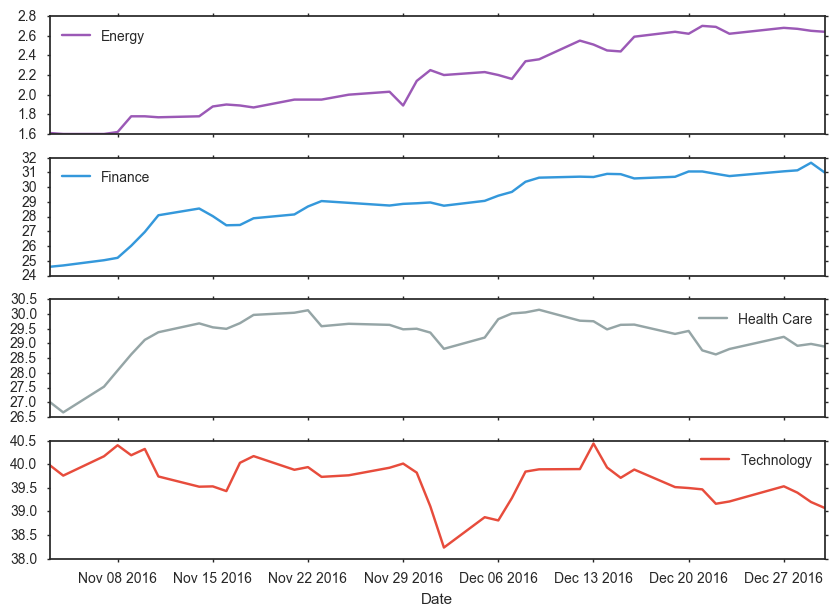

In [98]:
# Making Plots
plot_cols = list(avg_clean.columns)

# 2 axes for 2 subplots
fig, axes = plt.subplots(4,1, figsize=(10,7), sharex=True)
avg_clean[plot_cols].plot(subplots=True, ax=axes)

In Progress: Adding an interactive "timeline" below these plots with major events
Resources:
http://stackoverflow.com/questions/32619424/is-it-possible-to-plot-timelines-with-matplotlib
http://mpld3.github.io/notebooks/custom_plugins.html

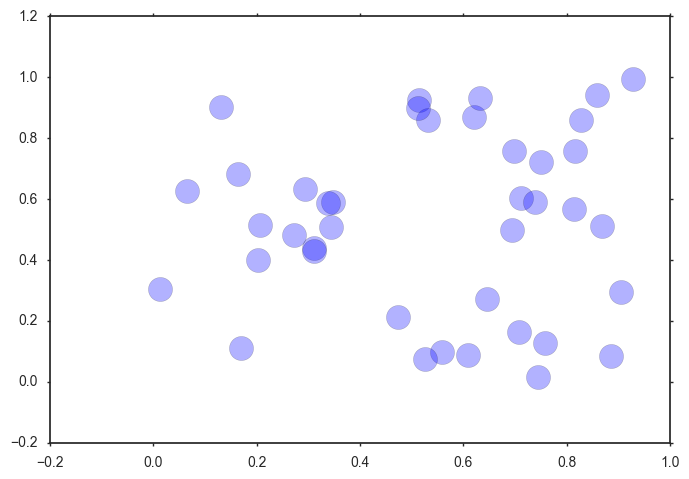

In [121]:
# how to create an interactive timeline
import mpld3
mpld3.enable_notebook()

fig, ax = plt.subplots()
points = ax.scatter(np.random.rand(40), np.random.rand(40),
                    s=300, alpha=0.3)
# labels: list of string objects
labels = ["Point {0}".format(i) for i in range(40)]
tooltip = plugins.PointLabelTooltip(points, labels)

plugins.connect(fig, tooltip)

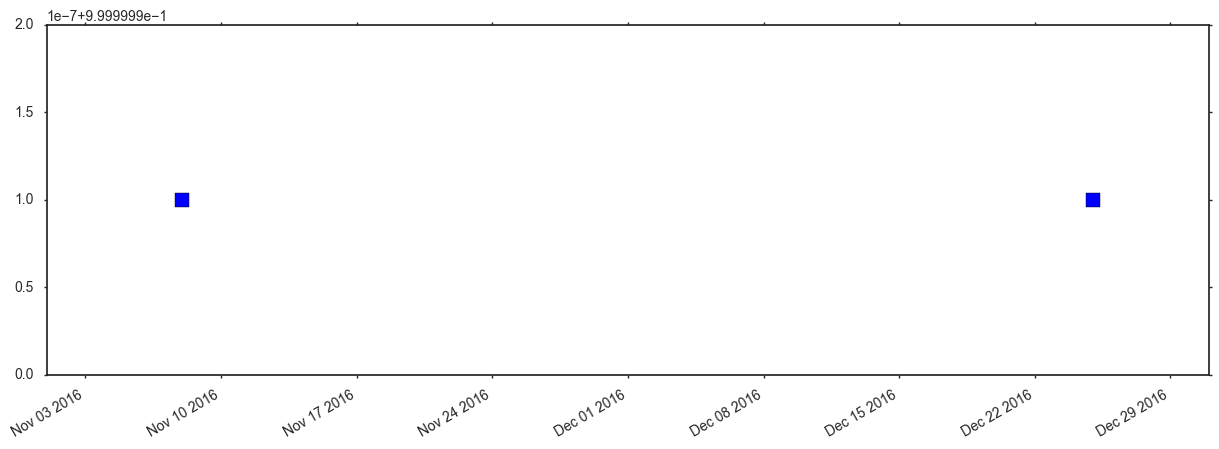

In [147]:
# This is our attempt at creating an interactive "TIMELINE"
# we cannot figure out how to erase y-axis
datelist = pd.date_range(pd.to_datetime('2016-11-1'),periods=60).tolist()
eventlist = [pd.to_datetime('2016-11-8'),pd.to_datetime('2016-12-25')]
labels = ['e1','e2']
fig, ax = plt.subplots(figsize=(15,5))
points = ax.scatter(eventlist, [1]*len(eventlist),
           marker='s', s=100)
fig.autofmt_xdate()
ax.set_xlim([pd.to_datetime('2016-11-1'), pd.to_datetime('2016-12-31')])
ax.set_ylim(0.9999999,1.0000001)
tooltip = plugins.PointLabelTooltip(points, labels)

plugins.connect(fig, tooltip)

In [91]:
comp = Share('YHOO')

In [93]:
report = []

c = comp.get_historical('2000-11-03', '2001-01-28')
        
for i in range(0,10):
    dat = {'Symbol':c[i]['Symbol'],c[i]['Date']:float(c[i]['High']),'Sector':c[i]['Sector']} 
    report.append(dat)
    df = pd.DataFrame(report)
    df = df.replace(np.nan, 0).groupby('Symbol').sum()

KeyError: 'Sector'

In [94]:
comp.get_historical('2000-11-03', '2001-01-28')

[{'Adj_Close': '18.84375',
  'Close': '37.6875',
  'Date': '2001-01-26',
  'High': '38.625',
  'Low': '36.125',
  'Open': '37.625',
  'Symbol': 'YHOO',
  'Volume': '24462600'},
 {'Adj_Close': '19.59375',
  'Close': '39.1875',
  'Date': '2001-01-25',
  'High': '42.8125',
  'Low': '38.5625',
  'Open': '41.875',
  'Symbol': 'YHOO',
  'Volume': '44249200'},
 {'Adj_Close': '21.4375',
  'Close': '42.875',
  'Date': '2001-01-24',
  'High': '43.375',
  'Low': '38.00',
  'Open': '38.3125',
  'Symbol': 'YHOO',
  'Volume': '57294800'},
 {'Adj_Close': '19.476549',
  'Close': '38.953098',
  'Date': '2001-01-23',
  'High': '39.00',
  'Low': '34.1875',
  'Open': '34.4375',
  'Symbol': 'YHOO',
  'Volume': '34783200'},
 {'Adj_Close': '17.34375',
  'Close': '34.6875',
  'Date': '2001-01-22',
  'High': '35.75',
  'Low': '32.5625',
  'Open': '33.3125',
  'Symbol': 'YHOO',
  'Volume': '25512600'},
 {'Adj_Close': '16.90625',
  'Close': '33.8125',
  'Date': '2001-01-19',
  'High': '36.0625',
  'Low': '32.562